# Part I - (Loan Data from Prosper)
## by (Ademola Abiodun Saheed)

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The loan data from Prosper was obtained originally from Prosper which has several data sources for investors to analyze historical loan performance on the platform.

During the course of these analysis, the data set will be used to answer the following question.
</ol>
<li>What factors affect a loan’s outcome status?


<li>What affects the borrower’s APR or interest rate?


<li>Are there differences between loans depending on how large the original loan amount was?





## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan_data = pd.read_csv("prosperLoanData.csv")

In [3]:
loan_data.shape

(113937, 81)

In [4]:
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loan_data.LoanStatus.value_counts() 

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### What is the structure of your dataset?

The data has 81 variables( columns) and 113937 observations( rows)

### What is/are the main feature(s) of interest in your dataset?

The main features including loan amount, borrower rate (or interest rate), current loan status and borrower income. These will be used to measure what factors affect a loan’s outcome status, What affects the borrower’s APR or interest rate and answer if there are differences between loans depending on how large the original loan amount was?

The main interest should be figuring out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan.







  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The possible features are: loan amount, borrower rate (or interest rate), current loan status, borrower income and employment status

## Data Cleaning 

In [7]:
# Select necceasry features for the analysis in a subset data frame
features = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'LoanStatus','DebtToIncomeRatio']
loan_data_sub= loan_data[features]

In [8]:
loan_data_sub.head()

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,DebtToIncomeRatio
0,9425,0.16516,0.1580,3083.333333,36,NaN,Self-employed,Completed,0.17
1,10000,0.12016,0.0920,6125.000000,36,A,Employed,Current,0.18
2,3001,0.28269,0.2750,2083.333333,36,NaN,Not available,Completed,0.06
3,10000,0.12528,0.0974,2875.000000,36,A,Employed,Current,0.15
4,15000,0.24614,0.2085,9583.333333,36,D,Employed,Current,0.26


In [9]:
# descriptive statistics for numeric variables
loan_data_sub.describe()

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,DebtToIncomeRatio
count,113937.00000,113912.000000,113937.000000,1.139370e+05,113937.000000,105383.000000
mean,8337.01385,0.218828,0.192764,5.608026e+03,40.830248,0.275947
std,6245.80058,0.080364,0.074818,7.478497e+03,10.436212,0.551759
min,1000.00000,0.006530,0.000000,0.000000e+00,12.000000,0.000000
25%,4000.00000,0.156290,0.134000,3.200333e+03,36.000000,0.140000
50%,6500.00000,0.209760,0.184000,4.666667e+03,36.000000,0.220000
75%,12000.00000,0.283810,0.250000,6.825000e+03,36.000000,0.320000
max,35000.00000,0.512290,0.497500,1.750003e+06,60.000000,10.010000


In [10]:
loan_data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113937 non-null  int64  
 1   BorrowerAPR            113912 non-null  float64
 2   BorrowerRate           113937 non-null  float64
 3   StatedMonthlyIncome    113937 non-null  float64
 4   Term                   113937 non-null  int64  
 5   ProsperRating (Alpha)  84853 non-null   object 
 6   EmploymentStatus       111682 non-null  object 
 7   LoanStatus             113937 non-null  object 
 8   DebtToIncomeRatio      105383 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 7.8+ MB


In [13]:
# Remove loans with missing borrower APR information
loan_data_sub = loan_data_sub[~loan_data_sub.BorrowerAPR.isna()]

In [15]:
loan_data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113912 non-null  int64  
 1   BorrowerAPR            113912 non-null  float64
 2   BorrowerRate           113912 non-null  float64
 3   StatedMonthlyIncome    113912 non-null  float64
 4   Term                   113912 non-null  int64  
 5   ProsperRating (Alpha)  84853 non-null   object 
 6   EmploymentStatus       111682 non-null  object 
 7   LoanStatus             113912 non-null  object 
 8   DebtToIncomeRatio      105358 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 8.7+ MB


## Univariate Exploration

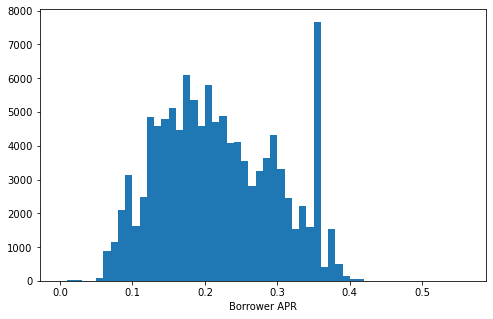

In [21]:
## Plot the distribution of the Borrower APR
bins = np.arange(0, loan_data_sub.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_sub, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


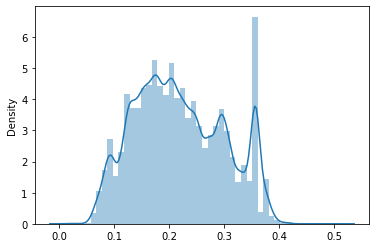

In [52]:
## Distribution plot for Borrower APR 
sb.distplot(x = loan_data['BorrowerAPR'],kde =True);

The distribution of Borrower APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35. Very few loans have APR greater than 0.4.

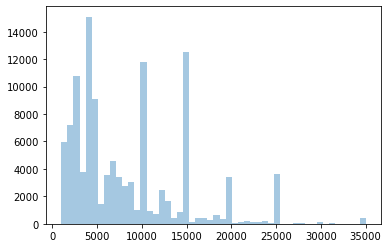

In [28]:
## Distribution plot for Loan Original Amount
sb.distplot(x = loan_data_sub['LoanOriginalAmount'], kde =False);

The large spikes in frequency are at 5k, 10k, 15k, 20k, and 25k. From the x scale we can observed that It means thatthe loans are multiples of 1k.

In [48]:
# ## Distribution plot for Loan Original Amount
# sb.distplot(x = loan_data_sub['StatedMonthlyIncome'], kde =False);

Text(0, 0.5, 'Count')

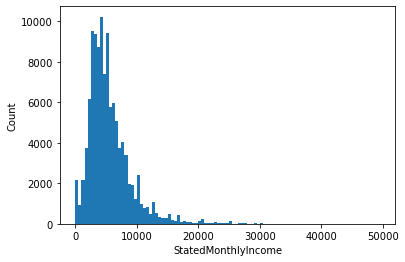

In [51]:
# Distribution of stated monthly income
bins = np.arange(0, 50000, 500)
plt.hist(data = loan_data_sub, x = 'StatedMonthlyIncome', bins=bins);
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')

The distribution of Stated Monthly Income variable is severely right skewed,And it also showed that most of Stated Monthly Income of the borrowers are less than 30k.

In [36]:
# # Check borrowers with stated monthly income greater than 1e5
# loan_data_sub[loan_data_sub.StatedMonthlyIncome>1e5]

In [35]:
# Get percent of borrowers whose stated monthly income greater than 30k
(loan_data_sub.StatedMonthlyIncome>30000).sum()/float(loan_data_sub.shape[0])

0.0028706369829341947

Less than 0.3 percent borrowers have stated monthly income greater than 30k, These are an outlier. For the analysis remove borrower records with income greater than 30k.

In [37]:
# remove loans with stated monthly income greater than 30k, which are outliers
loan_data_sub = loan_data_sub[loan_data_sub.StatedMonthlyIncome<=30000]

In [38]:
(loan_data_sub.StatedMonthlyIncome>30000).sum()

0

In [39]:
loan_data_sub["ProsperRating (Alpha)"].value_counts()

C     18291
B     15514
A     14492
D     14254
E      9785
HR     6918
AA     5350
Name: ProsperRating (Alpha), dtype: int64

In [40]:
loan_data_sub["EmploymentStatus"].value_counts()

Employed         67135
Full-time        26297
Self-employed     6076
Not available     5334
Other             3805
Part-time         1088
Not employed       835
Retired            794
Name: EmploymentStatus, dtype: int64

In [41]:
# Convert ProsperRating and Employment status into ordered categorical types
ordered_rate = ['A','AA','B','C','D','E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = ordered_rate)
loan_data_sub['ProsperRating (Alpha)'] = loan_data_sub['ProsperRating (Alpha)'].astype(ordered_var)

ordered_emp = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = ordered_emp)
loan_data_sub['EmploymentStatus'] = loan_data_sub['EmploymentStatus'].astype(ordered_var)

/var/folders/tx/shpgr2bd7f17c4xcnkyw5w2h0000gn/T/ipykernel_89555/2875565176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_sub['ProsperRating (Alpha)'] = loan_data_sub['ProsperRating (Alpha)'].astype(ordered_var)
/var/folders/tx/shpgr2bd7f17c4xcnkyw5w2h0000gn/T/ipykernel_89555/2875565176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_sub['EmploymentStatus'] = loan_data_sub['EmploymentStatus'].astype(ordered_var)


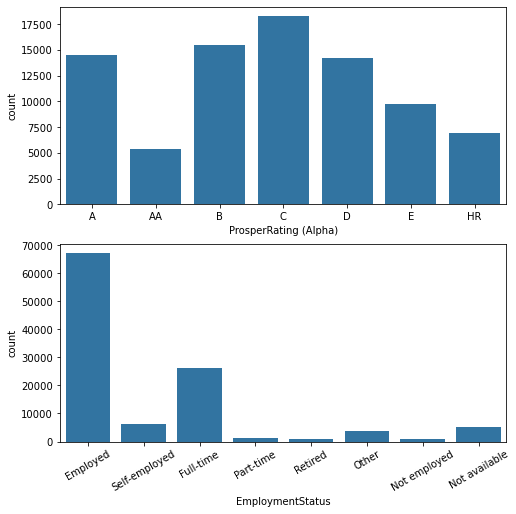

In [47]:
## Bar chat of the ProsperRating and Employment status
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
# sb.countplot(data = loan_data_sub, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = loan_data_sub, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0])
sb.countplot(data = loan_data_sub, x = 'EmploymentStatus', color = default_color, ax = ax[1]);
plt.xticks(rotation=30);

From the figure above, most of the borrower are C rating, and most are employed and full time.

<AxesSubplot:xlabel='Term', ylabel='count'>

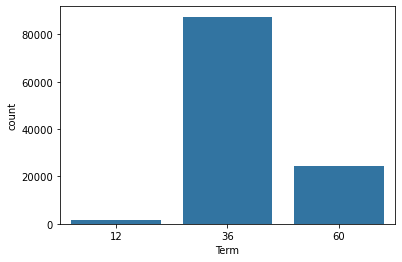

In [49]:
## ## Bar chat of the Loan Term
sb.countplot(data = loan_data_sub, x = 'Term', color = default_color)

From the term plot of the loan, we can see that the most of the loan term are 36 months.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of BorrowerAPR is multimodal distribution. The distribution of each of the other variables has been discussed beneath each plot. There are no strange values of the variable BorrowerAPR so no need for transformation. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions of stated monthly income is highly right screwed. Most stated monthly incomes are less than 30k, but some of them are incredibly high, like greater than 100k. Surprisingly, most of borrowers with greater than 100k monthly income only loan less than 5k dollars. So, the very large stated monthly income may be made up. Overall, Less than 0.3 percent borrowers have stated monthly income greater than 30k, these can be seemed as outlier for the following analysis, so it is better to remove borrower records with income greater than 30k.


## Bivariate Exploration

In [57]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','BorrowerRate','DebtToIncomeRatio']
categoric_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus','LoanStatus']

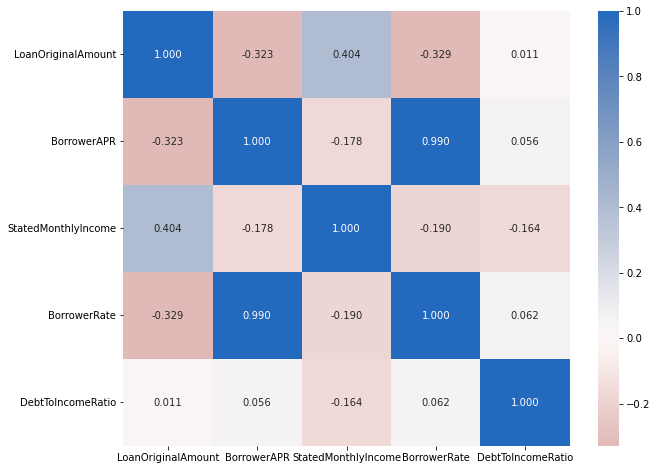

In [61]:
# correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(loan_data_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

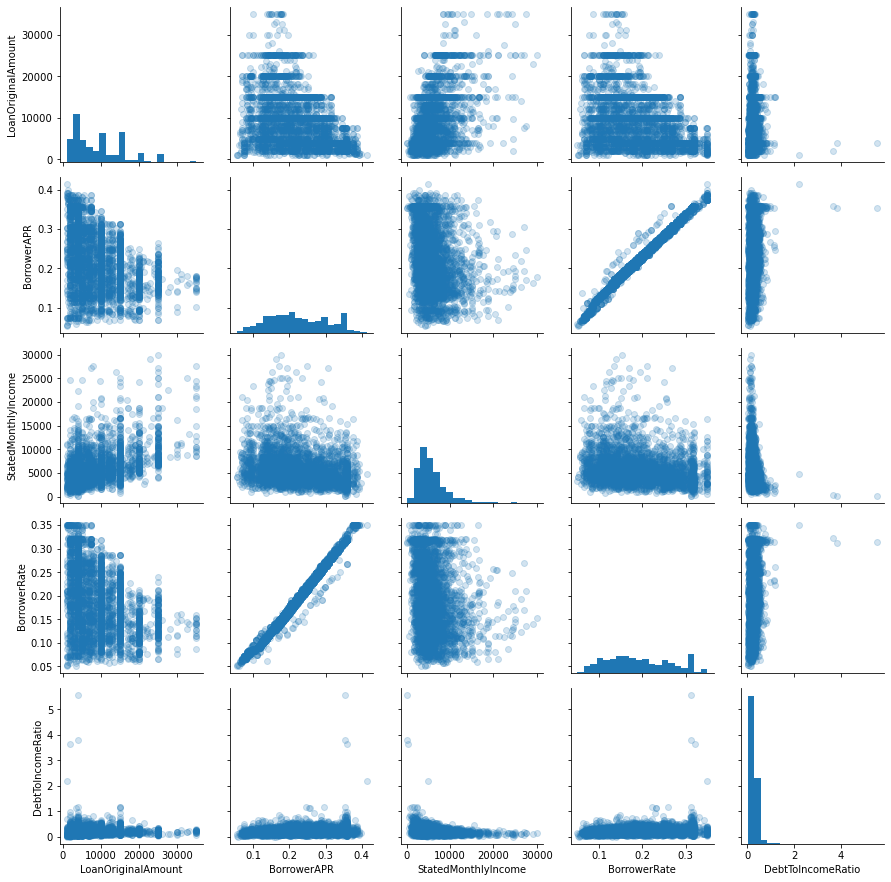

In [63]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
loan_data_sub_samp = loan_data_sub.sample(5000)
g = sb.PairGrid(data = loan_data_sub_samp.dropna(), vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

The correlation coefficient of borrower APR and loan original amount is -0.323,  loan original amount and stated monthly income is 0.404,  loan original amount and Borrower Rate is -0.329,  loan original amount and debt to income ratio is 0.011

the scatter plot also shows that these two variables (borrower APR and loan original amount) are negatively correlated, which agrees with the hypothesis, that is the more the loan amount, the lower the APR. The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.



/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, 

<Figure size 720x720 with 0 Axes>

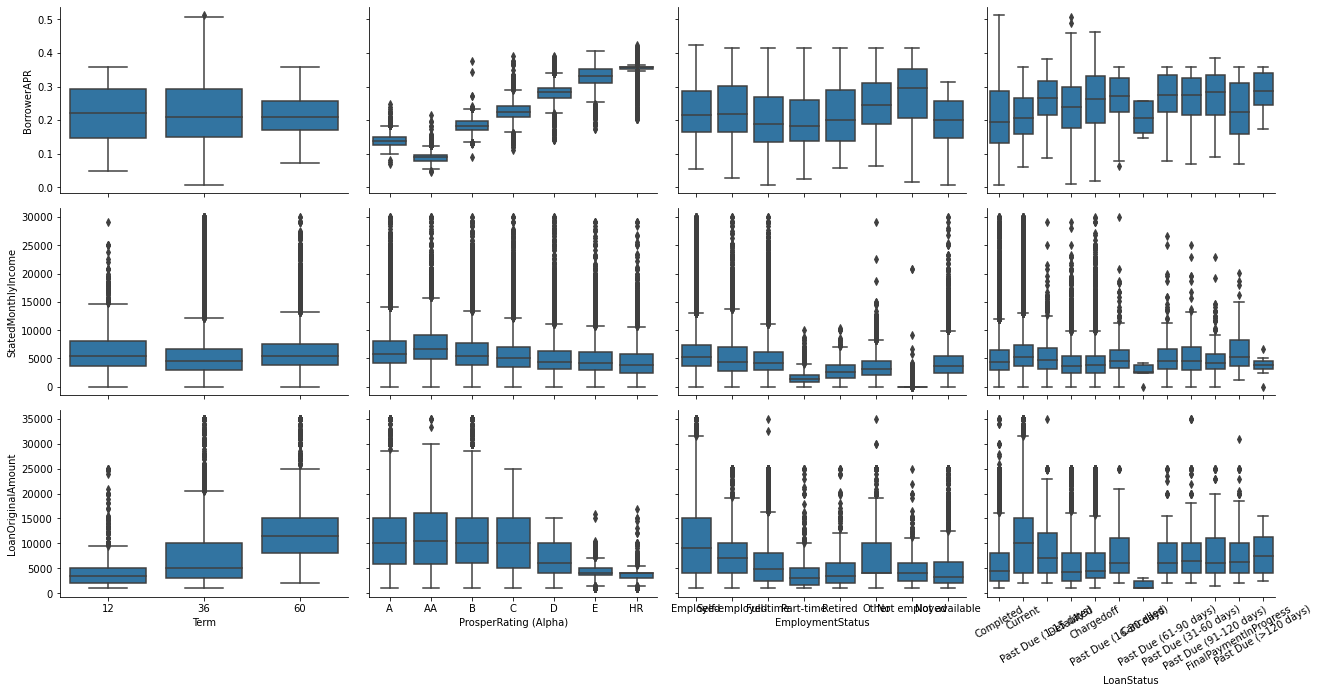

In [68]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_data_sub, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = categoric_vars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The figure shows that the loan amount is increased with the increase of loan term. The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

Finally, let's look at relationships between the three categorical features.

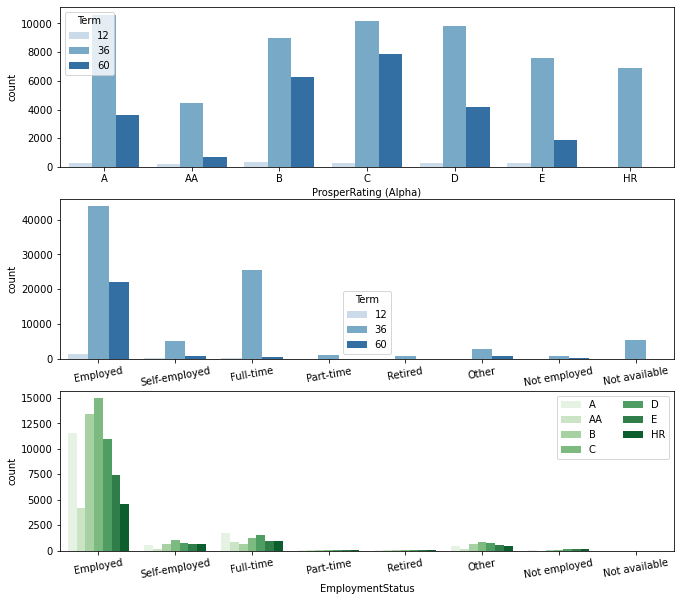

In [81]:
plt.figure(figsize = [11, 10])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = loan_data_sub, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_data_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_data_sub, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with term and Prosper rating variables. But we can see that there is a interaction between term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
The borrower APR is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The Prosper rating also has a strong effect on the borrower APR, which decreases with the better rating.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money. It also shows that borrowers with better rating also have larger monthly income and loan amount. There is a interaction between prosper rating and term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

## Multivariate Exploration



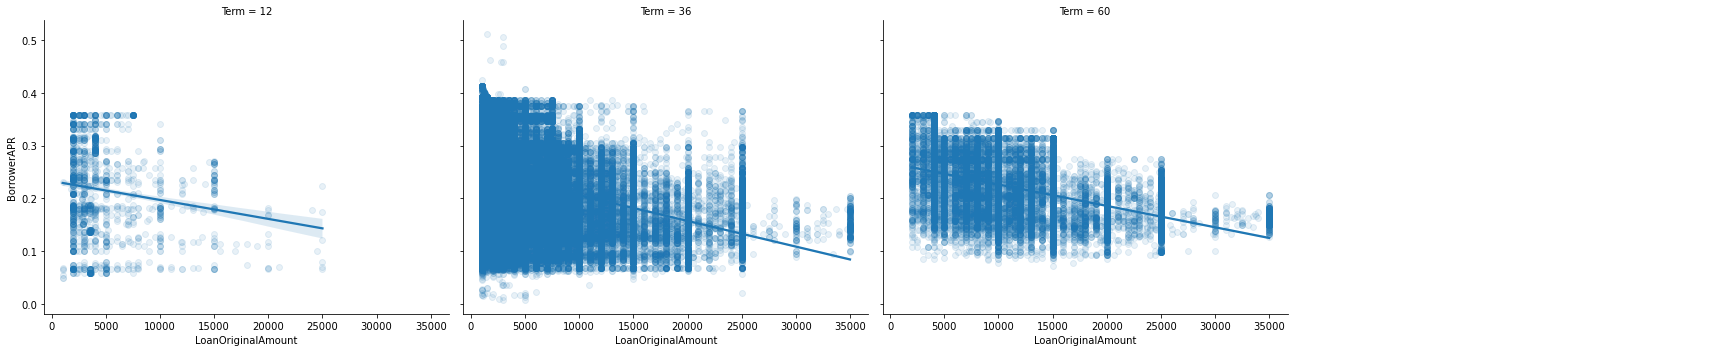

In [82]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_data_sub, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

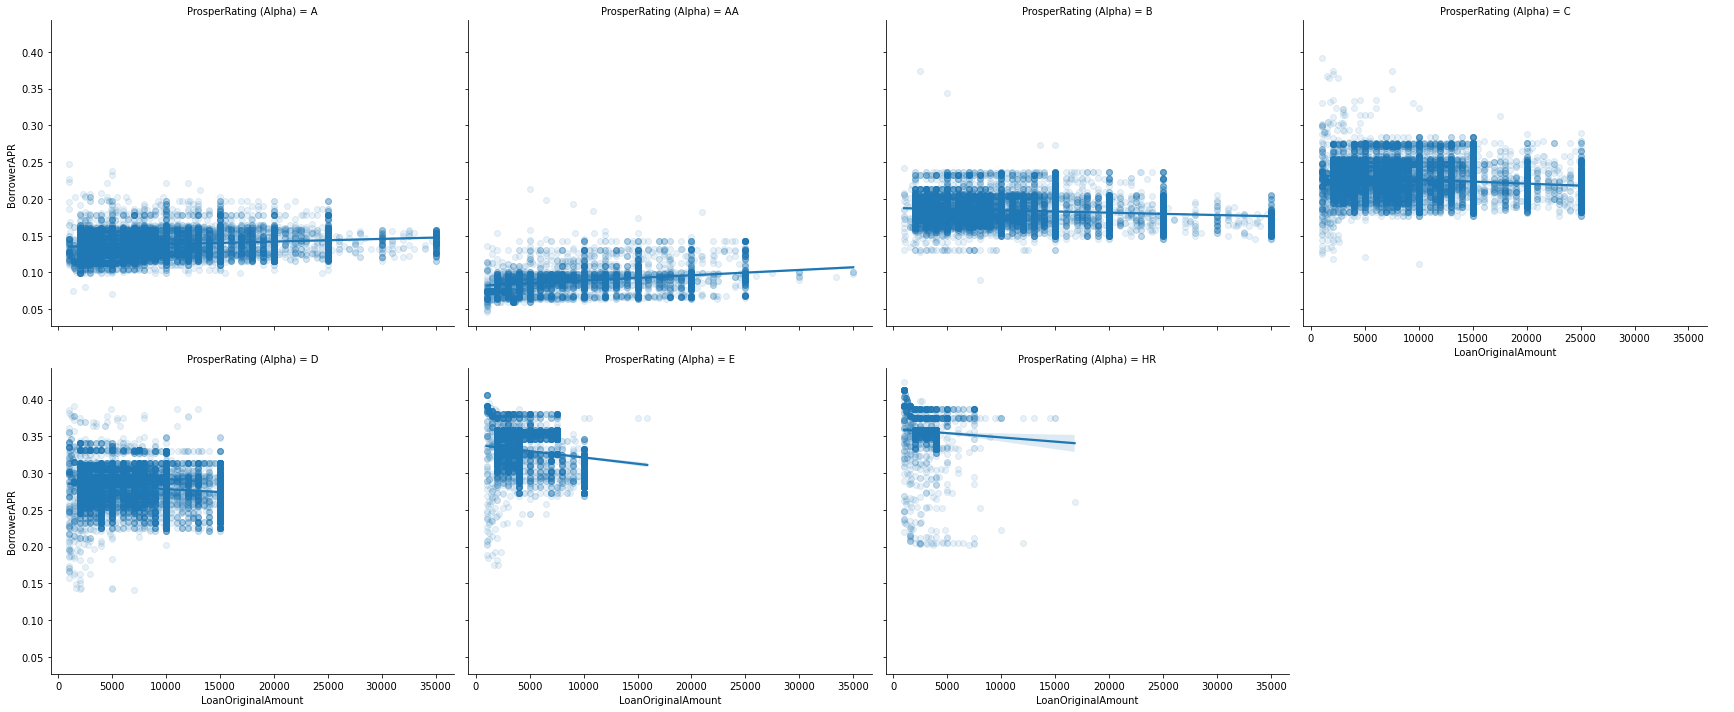

In [84]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_data_sub, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

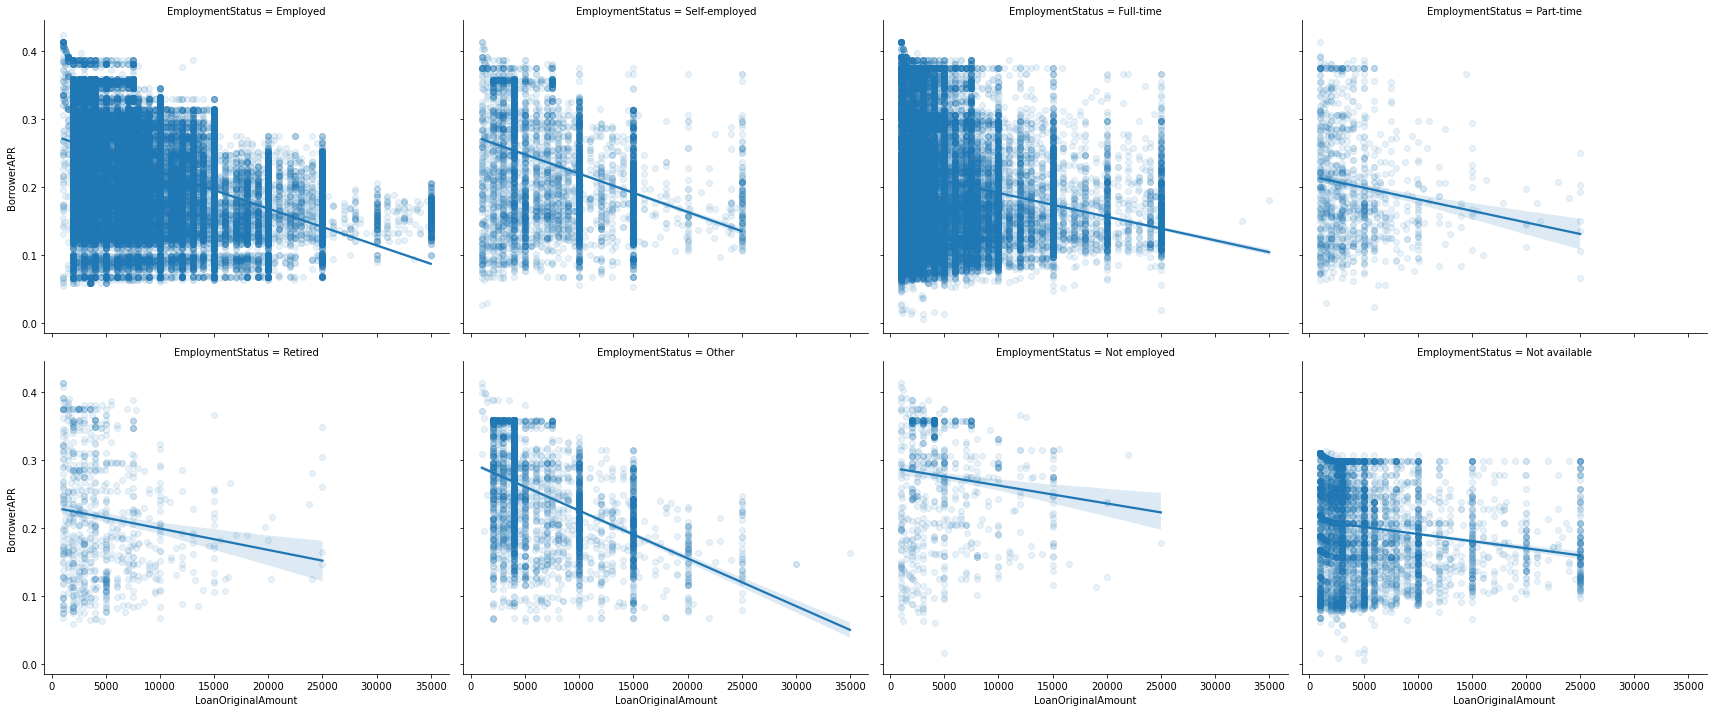

In [87]:
# Prosper rating effect on relationship of APR and Employment status
g=sb.FacetGrid(data=loan_data_sub, aspect=1.2, height=5, col='EmploymentStatus', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

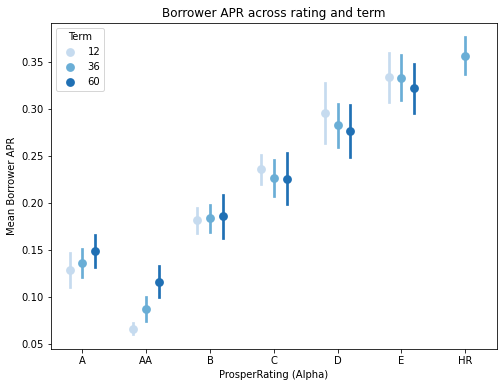

In [85]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_data_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

Interestingly, the borrower APR decrease with the increase of borrow term for people with HR to C ratings. But for people with B toA ratings, the APR increase with the increase of borrow term.

Then, look at the rating and term effects on stated monthly income and loan original amount variables

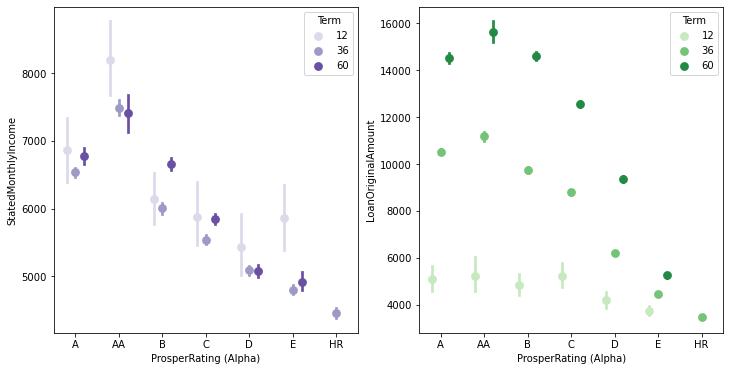

In [86]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = loan_data_sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loan_data_sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

For stated monthly income, there is no interaction effect between the terms and ratings, the pattern of term is similar among different ratings. But for loan amount, there is an interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We extended my investigation of borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Were there any interesting or surprising interactions between features?

A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
